In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [9]:
# 1.设置参数
DATA_DIR_PATH = "./test_data"
OUTPUT_PATH = "./picture"
file_list = []
metric_map ={
    "f1":"F1",
    "mcc":"MCC",
    "precision":"Precision",
    "recall":"Recall"
}

In [10]:
# 2.读取DATA_DIR_PATH下的所有xlsx文件
file_list = glob.glob(f"{DATA_DIR_PATH}/*.xlsx")
file_list

['./test_data\\f1#0.05.xlsx',
 './test_data\\f1#0.1.xlsx',
 './test_data\\mcc#0.05.xlsx',
 './test_data\\mcc#0.1.xlsx',
 './test_data\\precision#0.05.xlsx',
 './test_data\\precision#0.1.xlsx',
 './test_data\\recall#0.05.xlsx',
 './test_data\\recall#0.1.xlsx']

f1 0.05


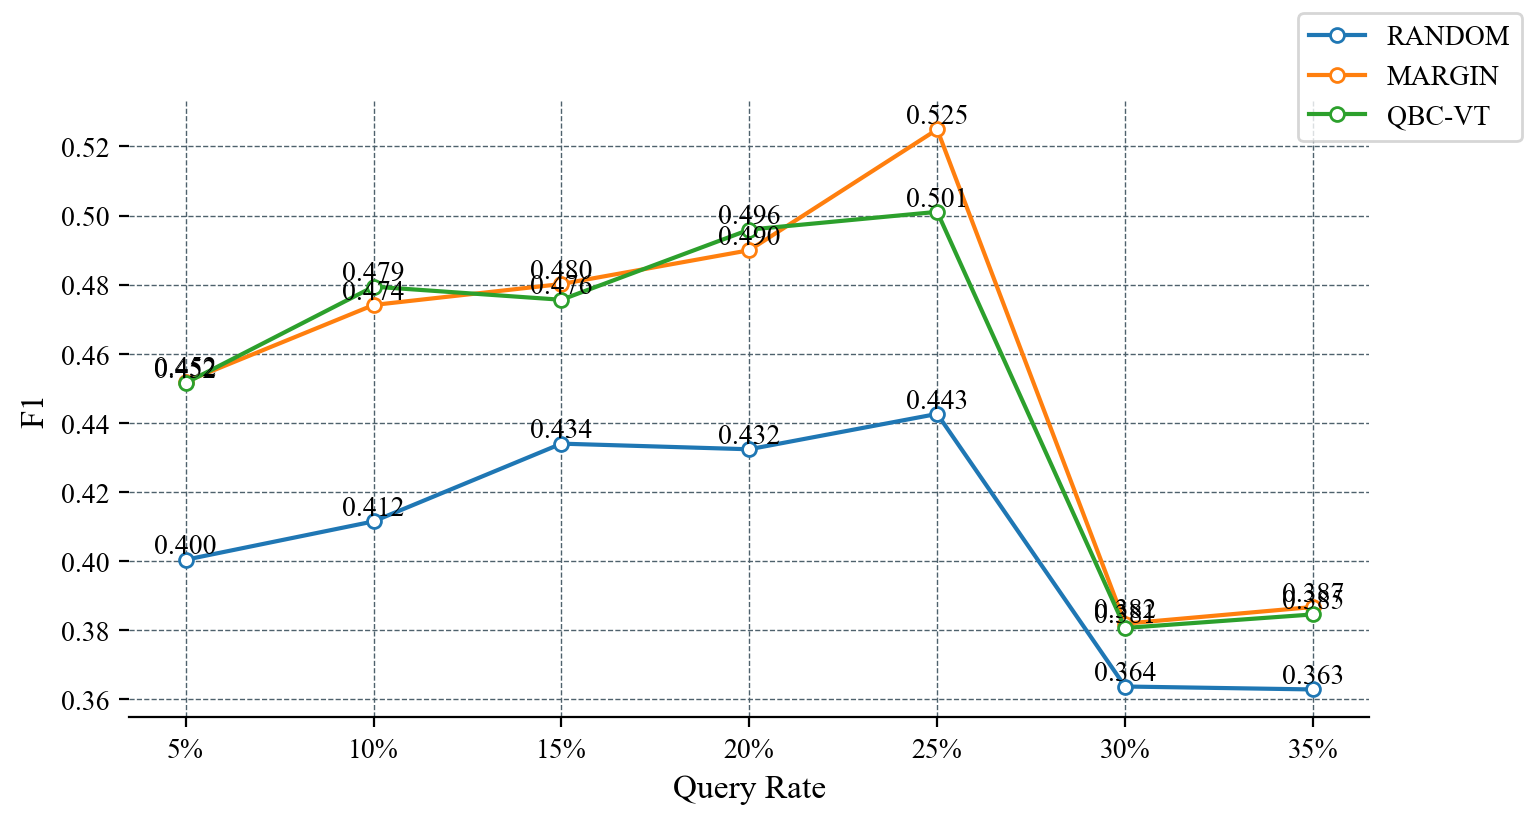

f1 0.1


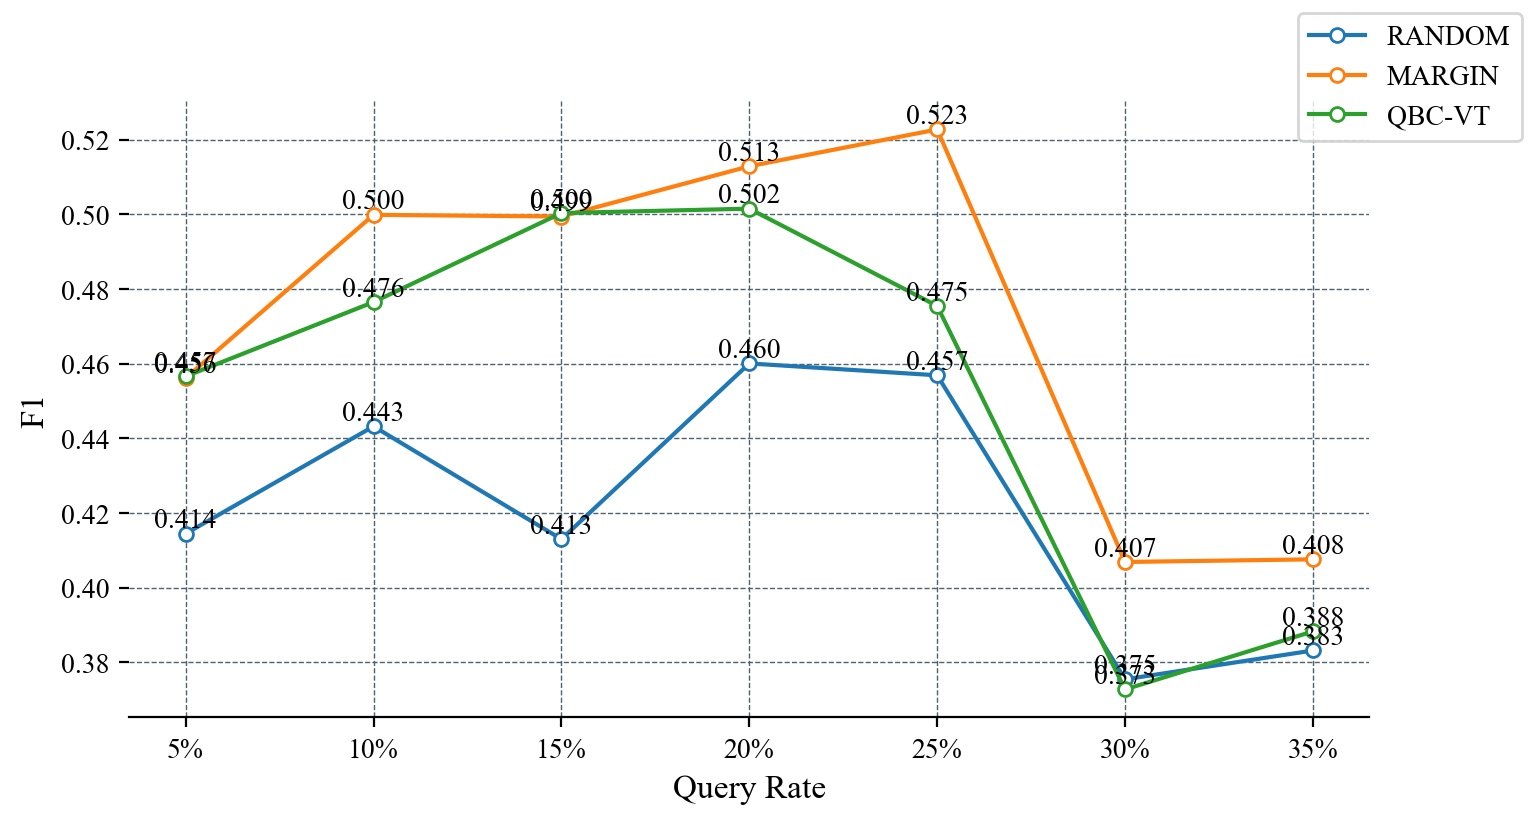

mcc 0.05


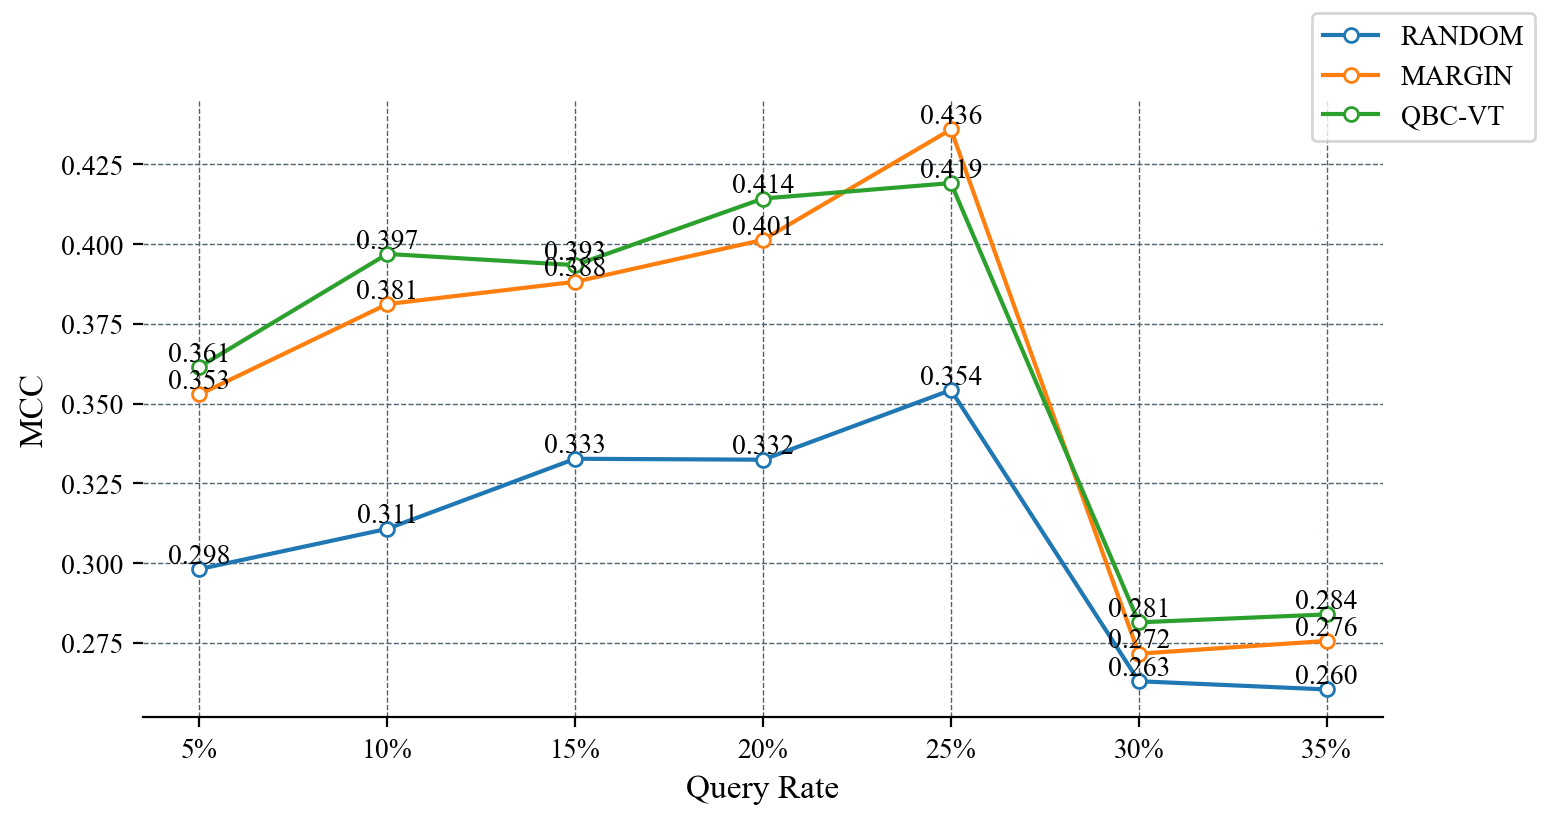

mcc 0.1


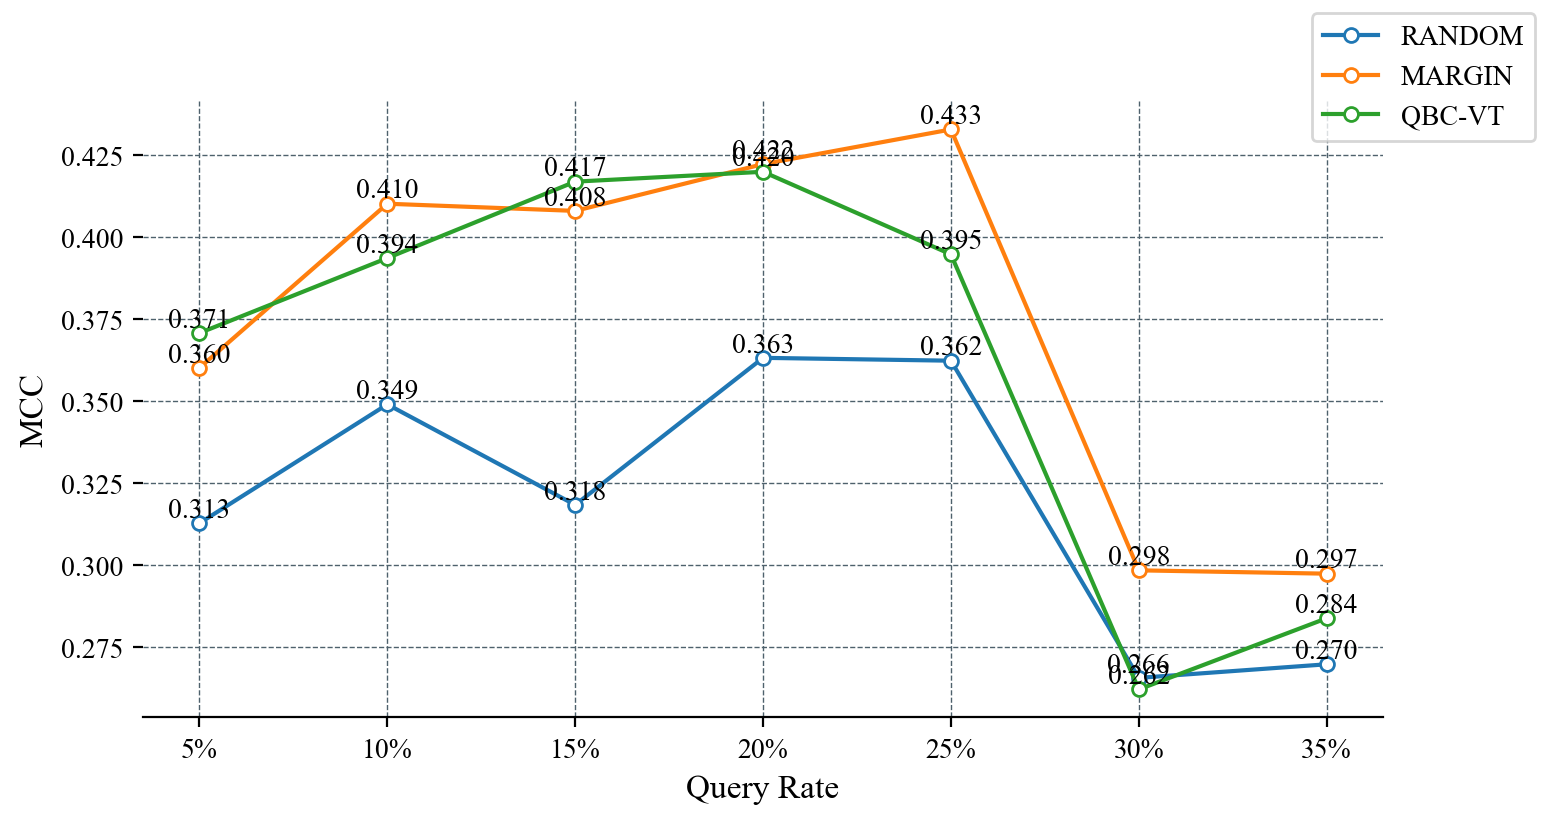

precision 0.05


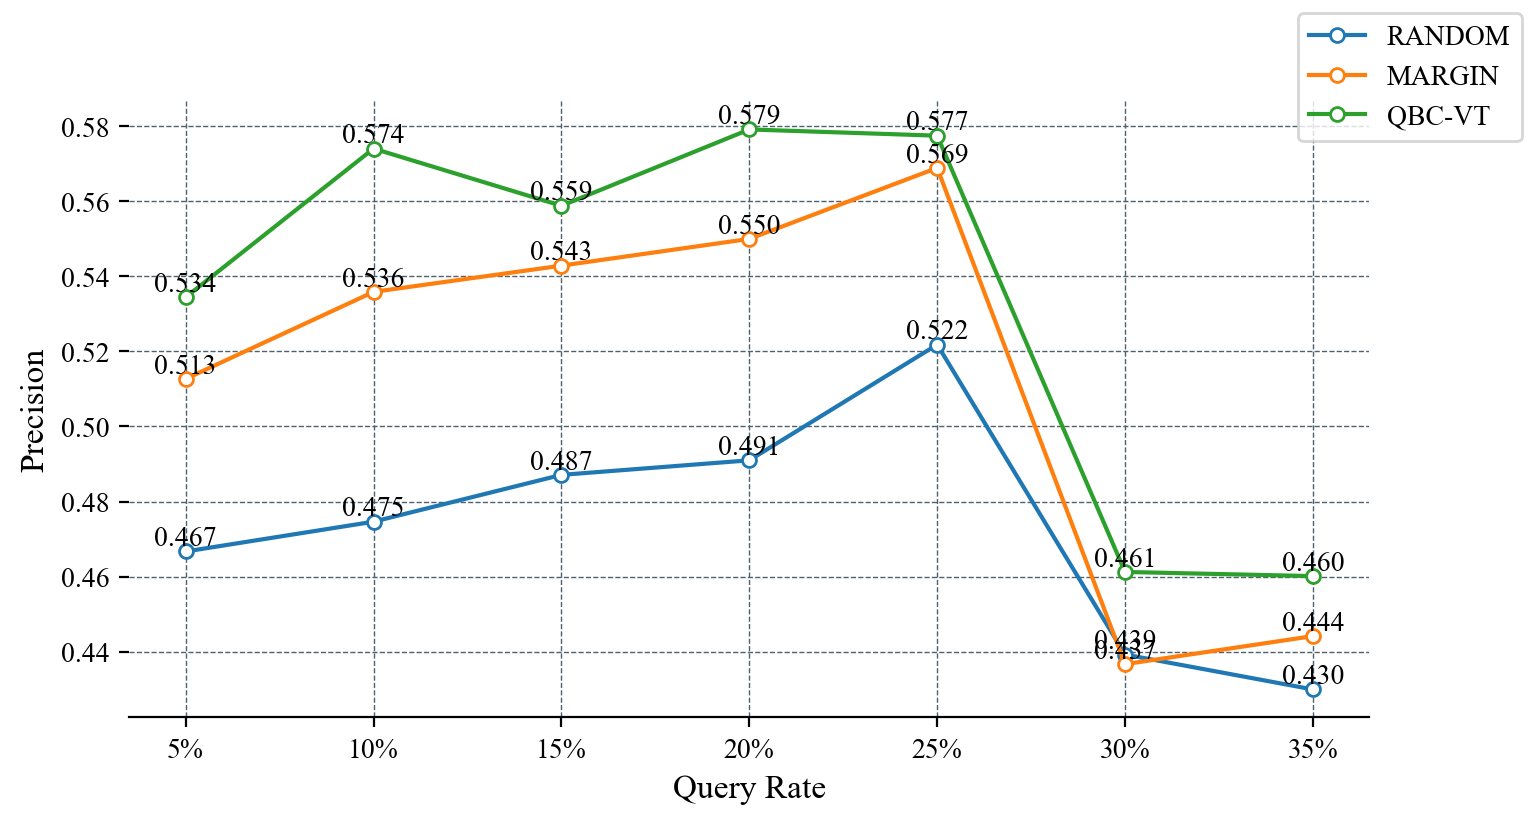

precision 0.1


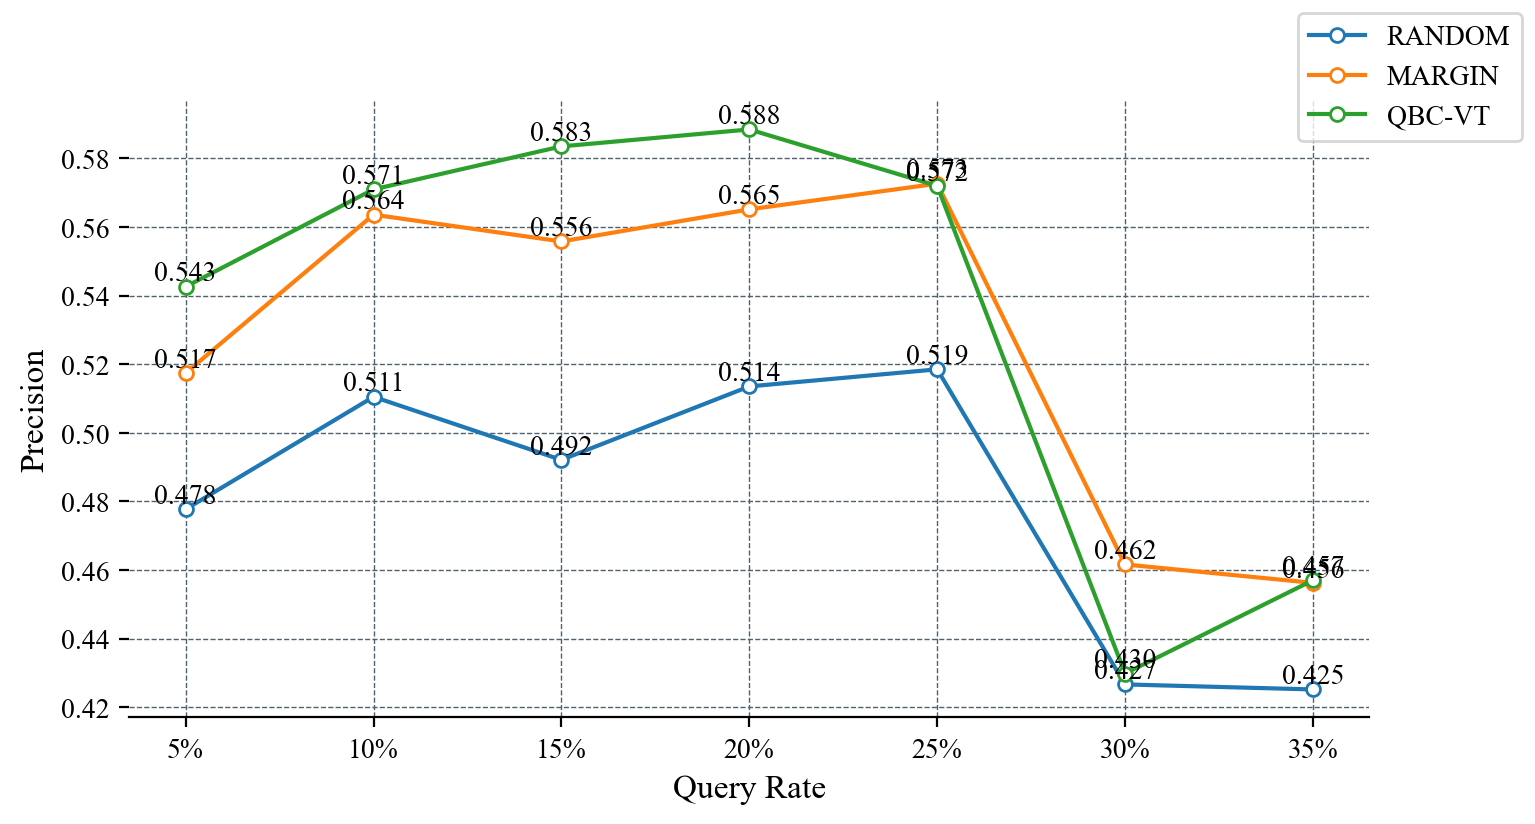

recall 0.05


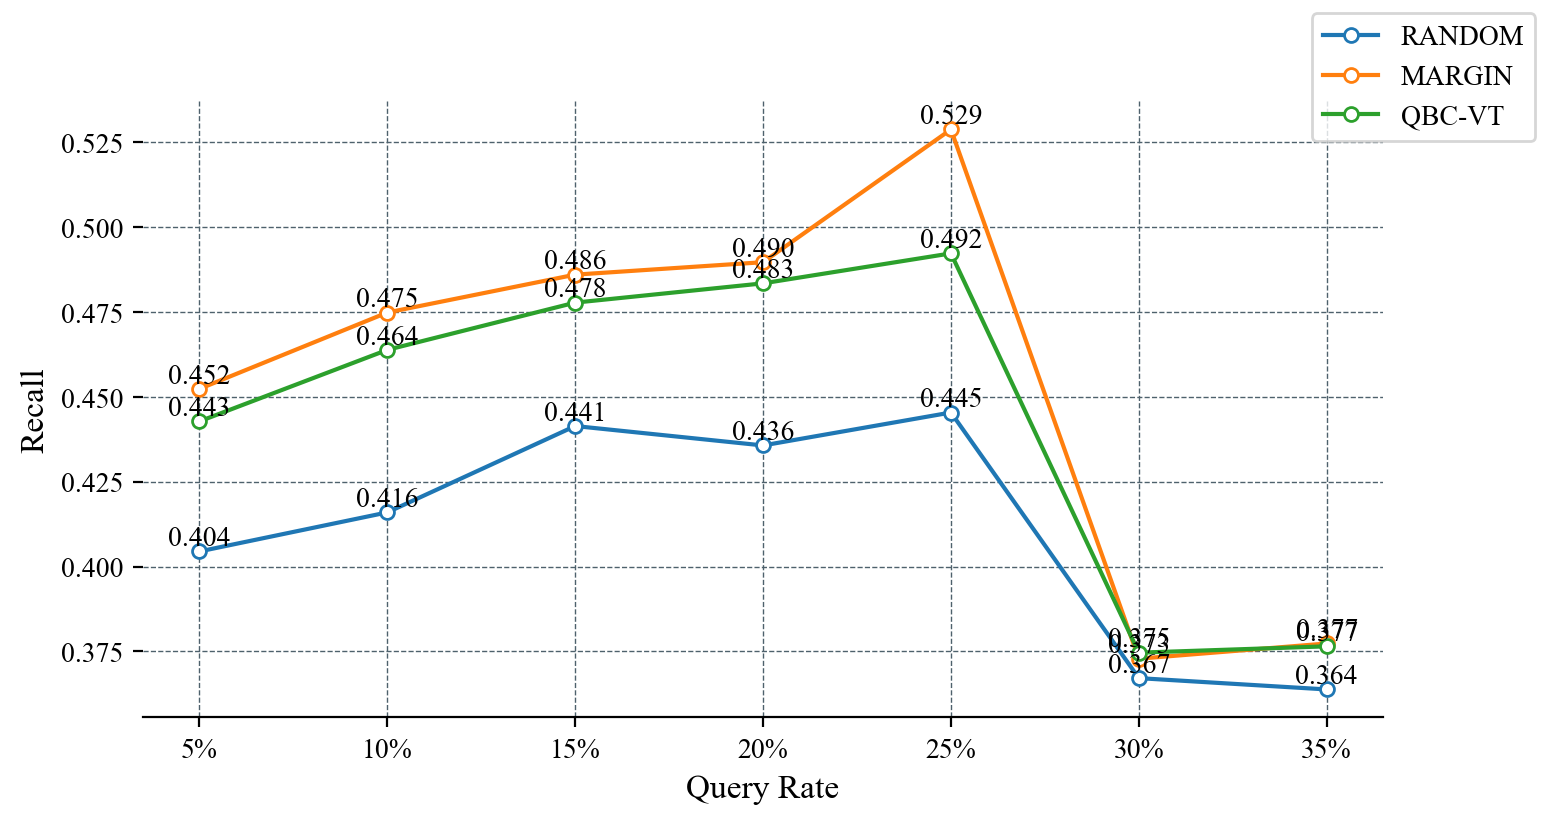

recall 0.1


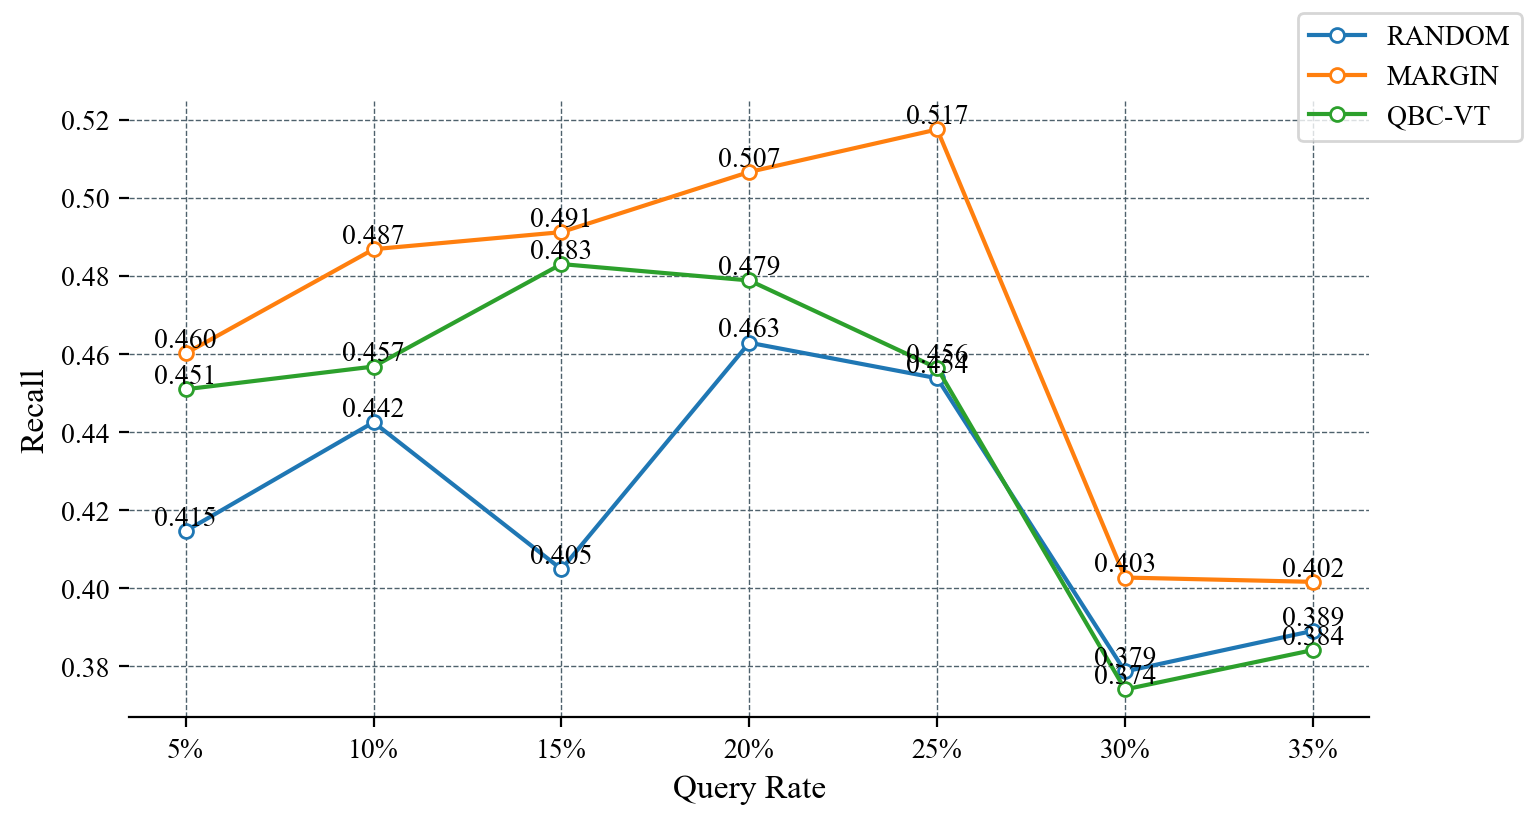

In [12]:
plt.rcParams['font.family'] = 'Times New Roman'
for file_path in file_list:
    data = pd.read_excel(file_path)
    file_path_arr = file_path.split("\\")
    file_info = file_path_arr[1].strip(".xlsx").split("#")
    metric = file_info[0]
    initial_rate = file_info[1]
    print(metric,initial_rate)

    # 获取数据
    X = data.columns[1:].values
    X = X.astype(float)
    Y1 = data.loc[0, X].to_numpy().astype(float)
    Y2 = data.loc[1,X].to_numpy().astype(float)
    Y3 = data.loc[2,X].to_numpy().astype(float)  

    fig, ax = plt.subplots(figsize=(8, 4), dpi=200)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(ls = "--", lw = 0.5, color = "#4E616C")

    ax.set_xlabel('Query Rate', fontsize=12)
    ax.set_ylabel(f'{metric_map[metric]}', fontsize=12)
    # ax.set_title(f"{metric_map[metric]} change at Initial Rate { int(float(initial_rate)*100)}%", fontsize=14)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))


    

    # 绘制折线图
    ax.plot(X, Y1, marker='o', label=data.loc[0, 'algorithm'],mfc="white", ms=5)
    ax.plot(X, Y2, marker='o', label=data.loc[1, 'algorithm'],mfc="white", ms=5)
    ax.plot(X, Y3, marker='o', label=data.loc[2, 'algorithm'],mfc="white", ms=5)

    offset = 0  # Adjust based on your data scale

    for x, y in zip(X, Y1):
        ax.text(x, y+offset, f'{y:.3f}', ha='center', va='bottom')
    for x, y in zip(X, Y2):
        ax.text(x, y+offset, f'{y:.3f}', ha='center', va='bottom')
    for x, y in zip(X, Y3):
        ax.text(x, y+offset, f'{y:.3f}', ha='center', va='bottom')
    fig.legend()
    plt.show()
    fig.savefig(f"{OUTPUT_PATH}/lineplot-{metric}-{initial_rate}.png")